**Анализ лучших фильмов ужасов по мнению сайта Films.ru.**

Задачей нашего проекта является аналитика пользовательских предпочтений (т.е. проанализируем значения рейтингов), определение закономерностей в выборе фильмов для рейтинга лучших и тд. Данные берем с сайта https://www.film.ru/compilation/300-luchshih-filmov-uzhasov.

In [21]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
sns.set(style="whitegrid")

**Загрузка данных**

In [22]:
def parse_subtitle(subtitle_text):
    subtitle_text = re.sub(r'\s+', ' ', subtitle_text).strip()
    match = re.match(r'^(.*?)(\d{4})(?:\s+(\d{1,2}\+))?$', subtitle_text)
    if match:
        orig_name = match.group(1).strip()
        year = match.group(2)
        age_rating = match.group(3) if match.group(3) else ''
    else:
        orig_name = subtitle_text
        year = ''
        age_rating = ''
    return orig_name, year, age_rating

data = []
for n in range(1,11):
  URL = f"https://www.film.ru/compilation/300-luchshih-filmov-uzhasov/page=page{n}"
  resp = requests.get(URL)
  soup = bs(resp.text, "lxml")

  films = soup.find_all('div', class_="redesign_afisha_movie")

  for film in films:
      rus_name = film.find('a', class_="redesign_afisha_movie_main_title").find('strong').text.strip()
      subtitle_text = film.find('div', class_="redesign_afisha_movie_main_subtitle").text
      orig_name, year, age_rating = parse_subtitle(subtitle_text)
      info_text = film.find('div', class_="redesign_afisha_movie_main_info").text.strip()
      genre = info_text.split('/')[0].strip()
      country = info_text.split('/')[1].strip()
      rating_div = film.find('div', class_="redesign_afisha_movie_main_rating")
      rate_film = rating_div.find('span').text.strip()
      rate_viewers = rating_div.find_all('span')[1].text.strip()
      rate_IMDb = rating_div.find_all('span')[2].text.strip()

      data.append([rus_name, orig_name, year, age_rating, genre, country, rate_film, rate_viewers, rate_IMDb])
data

[['Носферату', 'Nosferatu', '2024', '', 'детектив', 'США', '10', '5.5', '7.2'],
 ['Видения', 'Images', '1972', '', 'ужасы', 'США', '10', '5.3', '7'],
 ['Возмутитель спокойствия',
  'Borgman',
  '2013',
  '',
  'детектив',
  'Нидерланды',
  '10',
  '5.3',
  '6.7'],
 ['Все страхи Бо',
  'Beau Is Afraid',
  '2023',
  '18+',
  'драма',
  'Канада',
  '10',
  '5.5',
  '6.6'],
 ['Титан', 'Titane', '2021', '', 'драма', 'Франция', '10', '4.3', '6.5'],
 ['Побудь в моей шкуре',
  'Under the Skin',
  '2013',
  '16+',
  'детектив',
  'Великобритания',
  '10',
  '5.4',
  '6.3'],
 ['Субстанция',
  'The Substance',
  '2024',
  '18+',
  'драма',
  'Великобритания',
  '9',
  '5.9',
  '7.3'],
 ['Оно', 'It', '2017', '', 'драма', 'США', '9', '7.2', '7.3'],
 ['Варвар', 'Barbarian', '2022', '', 'триллер', 'США', '9', '5.9', '7'],
 ['Экстаз', 'Climax', '2018', '18+', 'драма', 'Франция', '9', '5.8', '6.9'],
 ['Нет', 'Nope', '2022', '16+', 'детектив', 'США', '9', '5.4', '6.8'],
 ['Бабадук',
  'The Babadook',
  

**Очистка данных и подготовка к анализу**

Преобразуем собранные данные в удобный для анализа датафрейм с помощью Pandas и скачаем таблицу.

In [23]:
headers = ['rus_name', 'orig_name', 'year', 'age_rating', 'genre', 'country', 'rate_film', 'rate_viewers', 'rate_IMDb']
df = pd.DataFrame(data, columns=headers)

df.to_excel("300_luchshih_filmov_uzhasov.xlsx", index=False)

from google.colab import files
files.download("300_luchshih_filmov_uzhasov.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
for col in df.columns:
    df[col] = df[col].astype(str).str.replace('\n', ' ', regex=True).str.strip()

df

,rus_name,orig_name,year,age_rating,genre,country,rate_film,rate_viewers,rate_IMDb
0,Носферату,Nosferatu,2024,,детектив,США,10,5.5,7.2
1,Видения,Images,1972,,ужасы,США,10,5.3,7
2,Возмутитель спокойствия,Borgman,2013,,детектив,Нидерланды,10,5.3,6.7
3,Все страхи Бо,Beau Is Afraid,2023,18+,драма,Канада,10,5.5,6.6
4,Титан,Titane,2021,,драма,Франция,10,4.3,6.5
...,...,...,...,...,...,...,...,...,...
295,Реинкарнация,Hereditary,2018,18+,детектив,США,8,6.1,7.3
296,Заклятие 2,The Conjuring 2,2016,,детектив,США,8,7.3,7.3
297,Выживут только любовники,Only Lovers Left Alive,2013,18+,драма,Германия,8,5.8,7.2
298,Осатаневшая,Kim Bok-nam salinsageonui jeonmal,2010,,драма,Республика Корея,8,6.0,7.2


*EDA:*

- Какие переменные/колонки есть?

In [ ]:
df.head(5)

,rus_name,orig_name,year,age_rating,genre,country,rate_film,rate_viewers,rate_IMDb
0,Носферату,Nosferatu,2024,,детектив,США,10,5.5,7.2
1,Видения,Images,1972,,ужасы,США,10,5.2,7.0
2,Возмутитель спокойствия,Borgman,2013,,детектив,Нидерланды,10,5.3,6.7
3,Все страхи Бо,Beau Is Afraid,2023,18+,драма,Канада,10,5.5,6.6
4,Титан,Titane,2021,,драма,Франция,10,4.3,6.5


Видим, что есть колонки (переменные) с именем

1.   rus_name, что показывает русскоязычное название,
2.   orig_name, что показывает оригинальное название,
3.   year - год выпуска,
4.   age_rating - возрастное ограничение,
5.   genre - жанр фильма,
6.   country - страна-производитель фильма,
7.   rate_film - рейтинг фильма по мнению критиков сайта Film.ru.
8.   rate_viewers - рейтинг фильма по мнению зрителей.
9.   rate_IMDb - рейтинг фильма по Internet Movie Database.

- Каких они типов?

Скорее всего, все они типа object. Проверим гипотезу.

In [25]:
df.dtypes

,0
rus_name,object
orig_name,object
year,object
age_rating,object
genre,object
country,object
rate_film,object
rate_viewers,object
rate_IMDb,object


Гипотеза подтвердилась, поэтому преобразуем все необходимое в числовой формат.

In [26]:
rating_columns_year = ['year', 'rate_film', 'rate_viewers', 'rate_IMDb']

for col in rating_columns_year:
    df[col] = pd.to_numeric(df[col])

df.dtypes

,0
rus_name,object
orig_name,object
year,int64
age_rating,object
genre,object
country,object
rate_film,int64
rate_viewers,float64
rate_IMDb,float64


- Есть ли пропуски?

Заметим, что не для всех фильмов указано возрастное ограничение. Его удалять не будем, т.к. для анализа оно не понадобится.

- Описательная статистика по переменной rate_viewers.

In [ ]:
df['rate_viewers'].mean()

np.float64(6.053333333333334)

In [ ]:
df.rate_viewers.median()

6.0

{'whiskers': [<matplotlib.lines.Line2D at 0x79c45d54cf50>,
 'caps': [<matplotlib.lines.Line2D at 0x79c45d54d4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79c45d54d6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79c45d4786d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79c45d479e50>],
 'means': []}

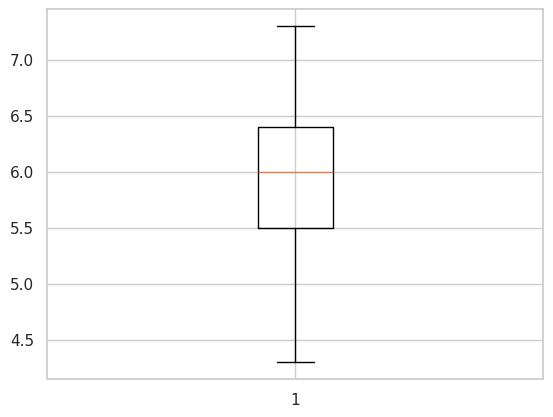

In [ ]:
plt.boxplot(df.rate_viewers)

На графике "ящик с усами" видно, что выбросов среди значений rate_viewers нет, данные распределены равномерно, т.к. медиана примерно равна средней. (фильмы достаточно средние по оценкам зрителей, макс = 10, а тут макс 7.3)


- Уникальные значения среди переменной rate_IMDb.

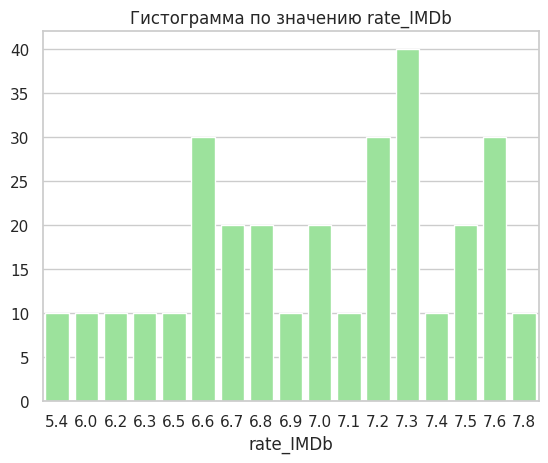

In [36]:
rate_counts = df['rate_IMDb'].value_counts()
sns.barplot(x=rate_counts.index, y=rate_counts.values, color="lightgreen")
plt.title('Гистограмма по значению rate_IMDb')
plt.show()

Заметим, что среди значений рейтинга по IMDb есть значение 5.4, которое характерно для 10 фильмов из топа, после которого есть "пропасть" в 0.6 балла. Это говорит о наличии уникальных значений среди фильмов из топа.

**Анализ и визуализация**

*Выявим, какая страна наиболее успешна в выпуске фильмов.*

In [28]:
df.columns = ['Название', 'Название_англ', 'Год', 'Возраст', 'Жанр', 'Страна', 'Оценка', 'Критики', 'Зрители']

country_counts = df['Страна'].value_counts().reset_index()
country_counts.columns = ['Страна', 'Количество фильмов']

country_translate = {
    'США': 'United States',
    'Великобритания': 'United Kingdom',
    'Франция': 'France',
    'Канада': 'Canada',
    'Австралия': 'Australia',
    'Германия': 'Germany',
    'Нидерланды': 'Netherlands',
    'Ирландия': 'Ireland',
    'Республика Корея': 'South Korea',
    'Новая Зеландия': 'New Zealand',
    'Испания': 'Spain',
    'Италия': 'Italy',
    'Япония': 'Japan',
    'Швеция': 'Sweden',
    'Мексика': 'Mexico',
    'Дания': 'Denmark',
    'Норвегия': 'Norway',
    'Бельгия': 'Belgium',
    'Финляндия': 'Finland',
    'Швейцария': 'Switzerland',
    'Австрия': 'Austria',
    'Польша': 'Poland',
    'Россия': 'Russia',
    'Китай': 'China',
    'Бразилия': 'Brazil'

}

country_counts['Страна_en'] = country_counts['Страна'].map(country_translate).fillna(country_counts['Страна'])
country_counts['log_size'] = np.log1p(country_counts['Количество фильмов']) * 10
palette = px.colors.qualitative.Plotly
country_counts['color'] = [palette[i % len(palette)] for i in range(len(country_counts))]
min_alpha = 0.3
max_alpha = 1.0
min_count = country_counts['Количество фильмов'].min()
max_count = country_counts['Количество фильмов'].max()
country_counts['alpha'] = min_alpha + (country_counts['Количество фильмов'] - min_count) / (max_count - min_count) * (max_alpha - min_alpha)
country_counts['rgba_color'] = [
    f'rgba({int(px.colors.hex_to_rgb(c)[0])},{int(px.colors.hex_to_rgb(c)[1])},{int(px.colors.hex_to_rgb(c)[2])},{a:.2f})'
    for c, a in zip(country_counts['color'], country_counts['alpha'])
]

import plotly.graph_objects as go
fig = go.Figure()

for _, row in country_counts.iterrows():
    fig.add_trace(go.Scattergeo(
        locationmode='country names',
        locations=[row['Страна_en']],
        marker=dict(
            size=row['log_size'],
            color=row['rgba_color'],
            line=dict(width=0.5, color='black')
        ),
        name=row['Страна'],
        hovertemplate=f"<b>{row['Страна']}</b><br>Фильмов: {row['Количество фильмов']}"
    ))

fig.update_layout(
    title='Распределение фильмов ужасов по странам (размер и плотность кружка = количество фильмов, логарифмическое масштабирование)',
    geo=dict(
        showland=True,
        landcolor="rgb(217, 217, 217)",
        projection_type='natural earth'
    ),
    legend_title_text='Страны'
)

fig.show()

Т.к. мы анализируем топ фильмов ужасов и тут сильно выделяется США, то можем сделать вывод о том, что именно эта страна наиболее успешна в кинопроизводстве.




*Дальше определим, какой жанр фильмов ужасов лучше всего по оценкам зрителей и IMDb (возьмем среднее для каждого фильма).*

<ipython-input-33-ddec90dd67df>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




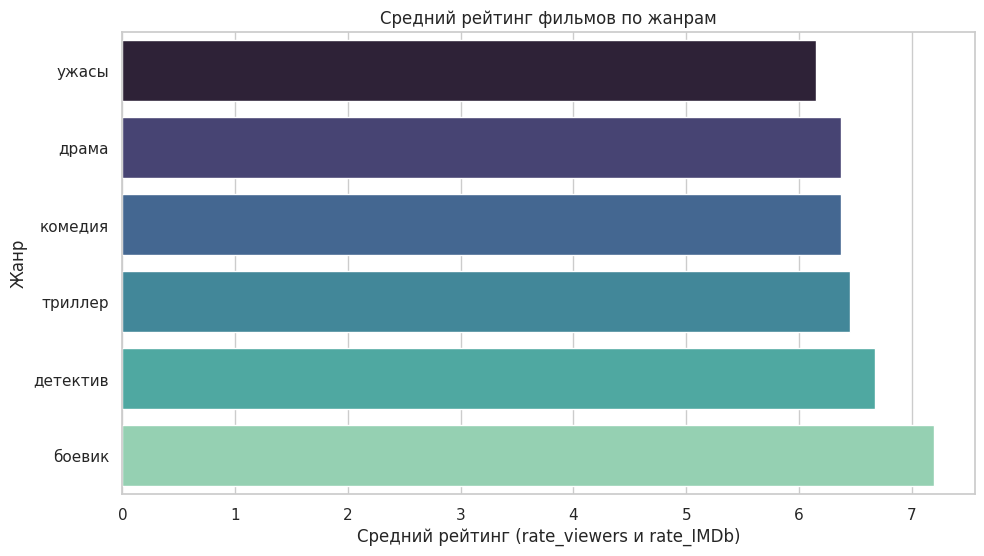

In [33]:
df.columns = ['rus_name', 'orig_name', 'year', 'age_rating', 'genre', 'country', 'rate_film', 'rate_viewers', 'rate_IMDb']
df['mean_rating'] = df[['rate_viewers', 'rate_IMDb']].mean(axis=1)

genre_mean = df.groupby('genre')['mean_rating'].mean().sort_values()

plt.figure(figsize=(11, 6))
sns.barplot(x=genre_mean.values, y=genre_mean.index, palette='mako')
plt.xlabel('Средний рейтинг (rate_viewers и rate_IMDb)')
plt.ylabel('Жанр')
plt.title('Средний рейтинг фильмов по жанрам')
plt.show()

Следом рассмотрим возможную зависимость между годом выпуска фильма и средним рейтингом между переменными rate_viewers и rate_IMDb.

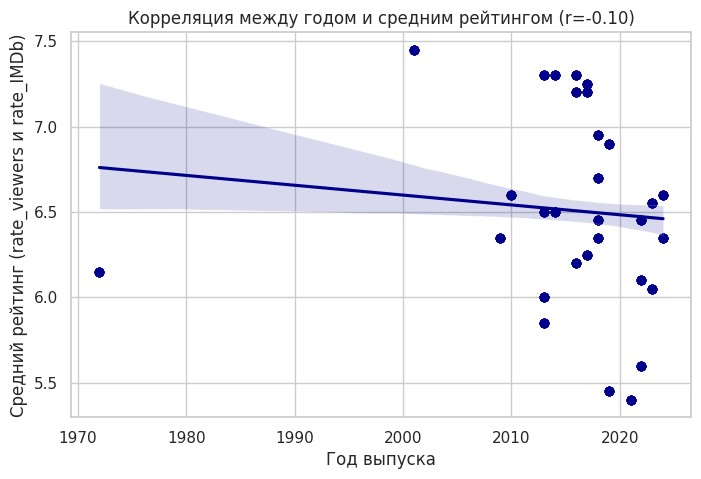

In [35]:
df_corr = df.dropna(subset=['year', 'mean_rating'])
corr = df_corr['year'].corr(df_corr['mean_rating'])
plt.figure(figsize=(8, 5))
sns.regplot(x='year', y='mean_rating', data=df_corr, scatter_kws={'alpha':0.7}, color = "darkblue")
plt.title(f'Корреляция между годом и средним рейтингом (r={corr:.2f})')
plt.xlabel('Год выпуска')
plt.ylabel('Средний рейтинг (rate_viewers и rate_IMDb)')
plt.show()

На графике не наблюдается выраженной зависимости между годом выпуска фильма и его средним рейтингом. Коэффициент корреляции равен -0.10, что указывает на очень слабую отрицательную связь, практически отсутствующую. Это значит, что год выпуска практически не влияет на средний рейтинг фильмов в данной выборке.

Рассмотрим тепловую карту корреляций для переменных year, rate_viewers

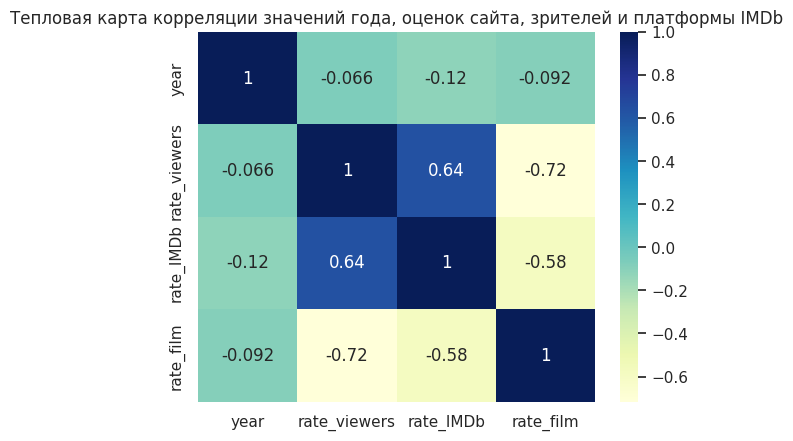

In [38]:
sns.heatmap(df[['year', 'rate_viewers', 'rate_IMDb', 'rate_film']].corr(), annot=True, cmap="YlGnBu")
plt.title('Тепловая карта корреляции значений года, оценок сайта, зрителей и платформы IMDb')
plt.show()

На тепловой карте корреляций видно, что:
- между rate_viewers и rate_IMDb корреляция 0.64 - это довольно сильная положительная связь: если один рейтинг высокий, обычно и другой тоже.

- между rate_viewers и rate_film корреляция -0.72 - сильная отрицательная связь: когда один рейтинг высокий, другой - низкий.

- между year и остальными переменными корреляция очень слабая (близка к нулю), значит, год выпуска почти не влияет на рейтинги.

**Выводы:**

*Анализ рейтингов*
1. Между оценками зрителей и рейтингом IMDb обнаружена положительная корреляция (около 0.6–0.7), то есть если фильм высоко оценён зрителями, он, как правило, имеет и высокий рейтинг на IMDb.

2. Авторский рейтинг часто расходится с массовыми оценками, что видно по отрицательной корреляции между rate_film и остальными рейтингами. Это говорит о субъективности авторской оценки и, возможно, о более строгом или специфическом подходе к оценке фильмов.

3. Корреляция между годом выпуска и средним рейтингом практически отсутствует (коэффициент близок к нулю). Это значит, что ни новые, ни старые фильмы не имеют явного преимущества по средним оценкам: качество фильмов не зависит напрямую от времени их выхода.

*Рейтинги по жанрам*

1. При группировке по жанрам видно, что некоторые жанры стабильно получают более высокие средние оценки (например, детективы и боевики), а другие - ниже (например, драма и ужасы).

2. Внутри жанров разброс оценок может быть значительным, что говорит о разном уровне восприятия даже внутри одной категории.

*Рейтинги по странам*
1. Фильмы из США, Франции, Германии, Республики Корея и других стран представлены широко.

2. Лидером среди стран по кинопроизводству является США.

**Обсуждение**

В рамках нашего исследования мы хотели проанализировать популярный сайт Film.ru, чтобы определить тенденции формирования топа-300 лучших фильмов ужасов: кинопроизводства каких стран фильмы наиболее успешны, какие жанры вызывают больше/меньше эмоций у зрителей, действительно ли кино как вино - с каждым годом все лучше.

Нам удалось определить, что:
- большинство (около половины наблюдений) фильмов ужасов из топа сняты США, что говорит о том, что стоит выбирать фильмы именно этой страны, чтобы точно испугаться или напугать кого-то);
- наивысшие оценки чаще всего встречаются у фильмов ужасов с жанром боевик;
- "возраст" фильма не гарантирует его качество - есть хорошие как среди новых, хорошие из старых, но зависимости между возрастом и рейтингом не наблюдается, но не можем отрицать случаи, когда фильмы ужасов, которые действительно как вино.

Как ваше исследование можно было бы улучшить? Наверняка было бы здорово проанализировать и текстовые данные: актерский состав, режиссеры, сценаристы, т.к. это позволяет в первую очередь знакомить зрителей с творцами тех фильмов, что были выбраны, а также формировать более точный вкус в ужастиках. Еще было бы круто проанализировать сведения об уровне страха, хоть эта вещь и субъективная, и все же может помочь в выборе. То есть основные рекомендации заключаются в расширении базы данных.

Наше исследование полезно всем тем, кто часто обращается на подобные сайты с целью найти, что посмотреть на вечер. Таким образом, мы упрощаем эту задачу, т.к. определяем черты хороших фильмов (страна made in, год выпуска, жанр, оценка),что определенно полезно. Не отрицаем факта индивидуальных предпочтений в ужастиках, но в общем случае, когда определить не получается, а посмотреть хочется, будет здорово знать результаты нашего исследования.